# Making the data visual

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import src.clean_utils as cu
import matplotlib.pyplot as plt

In [20]:
# Import the reviews and visits dataset:
Abb_NY_clean = pd.read_csv("output/Abb_NY_output.csv",encoding = "ISO-8859-1")
Abb_NY_clean.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,year
0,Brooklyn,Kensington,Private room,149,1,9,2018.0
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019.0
2,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019.0
3,Manhattan,East Harlem,Entire home/apt,80,10,9,2018.0
4,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019.0


In [21]:
# Import the monuments dataset:
monuments_NY_clean = pd.read_csv("output/df_NYmonuments_output.csv",encoding = "ISO-8859-1")
monuments_NY_clean.head()

,monuments,neighbourhood
0,American Museum of Natural History,manhattan
1,America's Response Monument,manhattan
2,Apollo Theater,manhattan
3,Bank of America Tower,manhattan
4,Battery Park,manhattan


### What we want to see in or visual plots is which NY neighbourhood has more visits, and if it is related to the number of monuments per zone or it is related to price.

In the following plot we can se which are the neighbourhood with more AirBnB visits.


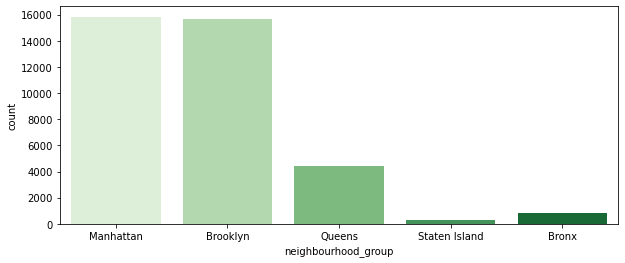

In [45]:
plt.figure(figsize=(10,4))
Ranking_plot = sns.countplot(x=Abb_NY_clean.neighbourhood_group, palette= "Greens", order=["Manhattan","Brooklyn","Queens","Staten Island","Bronx"])

In [117]:
#Export the plot
Ranking_plot.figure.savefig("output/Ranking_plot.jpg", dpi=100)

In the following plot we can see that Manhattan is the neighbourhood with more monuments (and we also know that there is also the financial district of NY), so it makes sense that most of the people would like to find a house to rent here. But what about Brooklyn? It has lot of AirBnB visit but not that much monuments.

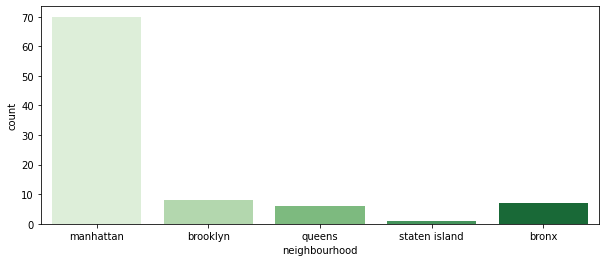

In [44]:
plt.figure(figsize=(10,4))
Monuments_plot = sns.countplot(x=monuments_NY_clean.neighbourhood, palette= "Greens", order=["manhattan","brooklyn","queens","staten island","bronx"])

In [118]:
#Export the plot
Monuments_plot.figure.savefig("output/Monuments_plot.jpg", dpi=100)

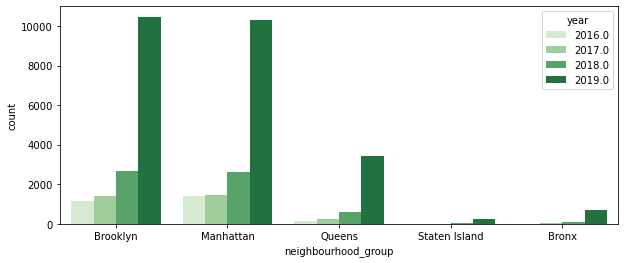

In [43]:
# Aditional information and how AirBnb has grown in the past years.
plt.figure(figsize=(10,4))
Ranking_year_species = sns.countplot(x=Abb_NY_clean.neighbourhood_group, hue=Abb_NY_clean.year, palette= "Greens")

And for complete our conclusion, I would like to focuss my attention on price so, I started by looking to the mean but as we have very high but individual prices I preffer to focuss on the median.

In [110]:
df_median=Abb_NY_clean.groupby("neighbourhood_group").median()
df_median["Name"] = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
df_median

,price,minimum_nights,number_of_reviews,year,Name
neighbourhood_group,,,,,
Bronx,64,2,15,2019.0,Bronx
Brooklyn,93,2,10,2019.0,Brooklyn
Manhattan,140,3,9,2019.0,Manhattan
Queens,72,2,14,2019.0,Queens
Staten Island,72,2,21,2019.0,Staten Island


And as we can see in the following plot, the median of price in Broklyn is much lower than in Manhattan and it is a close neighbourhood, so we can say that people also preffer to be on a neighbourhood that is more relax and near to where mostly every monuments and offices are.

<AxesSubplot:xlabel='Name', ylabel='price'>

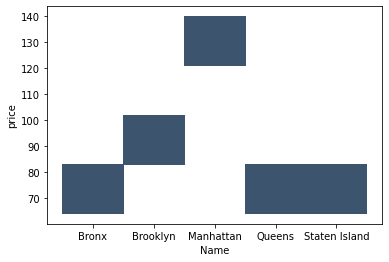

In [119]:
median_plot= sns.histplot(x=df_median.Name, y=df_median.price, palette= "Greens", fill=True)
median_plot

In [120]:
median_plot.figure.savefig("output/median_plot.jpg", dpi=100)

In [115]:
# Another way for seeing the mean. 1. we take out de extreme datas.
Abb_NY_clean=Abb_NY_clean[Abb_NY_clean.price < 1000]
Abb_NY_clean

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,year
0,Brooklyn,Kensington,Private room,149,1,9,2018.0
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019.0
2,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019.0
3,Manhattan,East Harlem,Entire home/apt,80,10,9,2018.0
4,Manhattan,Murray Hill,Entire home/apt,200,3,74,2019.0
...,...,...,...,...,...,...,...
37166,Manhattan,Upper East Side,Private room,129,1,1,2019.0
37167,Queens,Flushing,Private room,45,1,1,2019.0
37168,Staten Island,Great Kills,Private room,235,1,1,2019.0
37169,Bronx,Mott Haven,Entire home/apt,100,1,2,2019.0


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

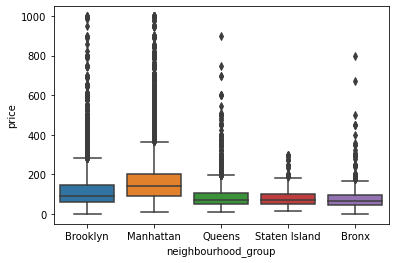

In [107]:
# And use a boxplot to se the line were every neighbourhood has their mean.
sns.boxplot(x="neighbourhood_group", y="price", data=Abb_NY_clean)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

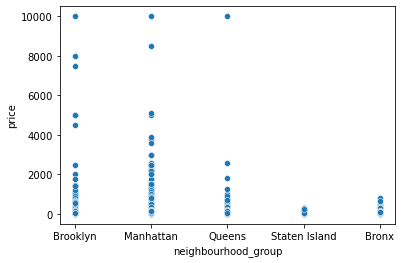

In [89]:
# And in the following graph we can see hoy the prices distributes deppending on neighbourhood:
sns.scatterplot(x="neighbourhood_group", y="price", data=Abb_NY_clean, palette= "Greens")